# Neural Prophet — Model Testing

Neural Prophet is an open source software that was released by Facebook's Core Data Science team and builds on the legacy Prophet. It bridges the gap between traditional time-series models and deep learning methods. Neural Prophet leverages a neural network with additional flexibility and capacity to capture intricate patterns. By using neural networks, it can potentially handle more complex time series patterns that involve nonlinear relationships, interactions, and dependencies. It can capture trends that exhibit nonlinear growth or decay, varying levels of smoothness, and intricate patterns that may be missed by simpler linear or additive models.

Read its documentation [here](https://neuralprophet.com/contents.html).

## Setting libraries and dataframes

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

%matplotlib inline

### Importing datasets and creating dataframe

In [2]:
data_hist = pd.read_csv("generated_data/historic_hi.csv")
data_rec = pd.read_csv("generated_data/recent_hi.csv")
data_lat = pd.read_csv("generated_data/latest_hi.csv")

In [3]:
### appends the two dataframes and creates a master dataframe
master = pd.concat([data_hist, data_rec, data_lat], ignore_index = True)

### filters for Miami-Dade county data
dade_daily_avg = master[master["COUNTY"] == "Miami-Dade"].reset_index(drop = True)
dade_daily_avg = dade_daily_avg.sort_values(by = "DATE", ascending = True).reset_index(drop = True)

### displays dataframe
dade_daily_avg

,COUNTY,LONG,LAT,ELEV,DATE,RAINFALL,TMIN,TMEAN,TMAX,TDMEAN,VPDMIN,VPDMAX,MONTH_YEAR,YEAR,MONTH_YEAR_STR,YEAR_STR,TMIN_INDEX,TMAX_INDEX,TMEAN_INDEX,REL_HUMIDITY
0,Miami-Dade,-80.5684,25.6148,7.0,1983-01-01,0.00,69.4,76.2,82.9,69.6,0.67,13.31,1983-01,1983,1983-01,1983,69.6,91.1,76.7,80.1
1,Miami-Dade,-80.5684,25.6148,7.0,1983-01-02,0.00,68.8,74.3,79.8,68.5,1.22,10.48,1983-01,1983,1983-01,1983,69.0,84.1,74.8,82.2
2,Miami-Dade,-80.5684,25.6148,7.0,1983-01-03,0.00,68.3,74.5,80.8,69.4,0.40,10.88,1983-01,1983,1983-01,1983,68.5,86.8,75.1,84.2
3,Miami-Dade,-80.5684,25.6148,7.0,1983-01-04,0.00,61.7,73.6,85.4,64.7,0.61,17.91,1983-01,1983,1983-01,1983,61.4,95.2,73.9,73.8
4,Miami-Dade,-80.5684,25.6148,7.0,1983-01-05,0.06,62.5,71.2,79.8,64.1,1.03,13.33,1983-01,1983,1983-01,1983,62.3,83.6,71.5,78.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14770,Miami-Dade,-80.5684,25.6148,7.0,2023-06-10,0.06,71.6,80.8,89.9,75.1,0.03,19.61,2023-06,2023,2023-06,2023,72.0,115.3,86.5,82.9
14771,Miami-Dade,-80.5684,25.6148,7.0,2023-06-11,0.51,73.7,82.4,91.0,75.0,0.27,22.37,2023-06,2023,2023-06,2023,74.1,115.7,89.3,78.4
14772,Miami-Dade,-80.5684,25.6148,7.0,2023-06-12,0.39,74.6,81.4,88.2,76.2,0.18,15.25,2023-06,2023,2023-06,2023,75.2,109.9,88.3,84.3
14773,Miami-Dade,-80.5684,25.6148,7.0,2023-06-13,0.53,74.5,81.1,87.6,76.3,0.23,13.53,2023-06,2023,2023-06,2023,75.1,108.4,87.8,85.4


In [4]:
### converts column to date-time type
dade_daily_avg["DATE"] = pd.to_datetime(dade_daily_avg["DATE"])

## Visualizing time series of daily mean temperatures

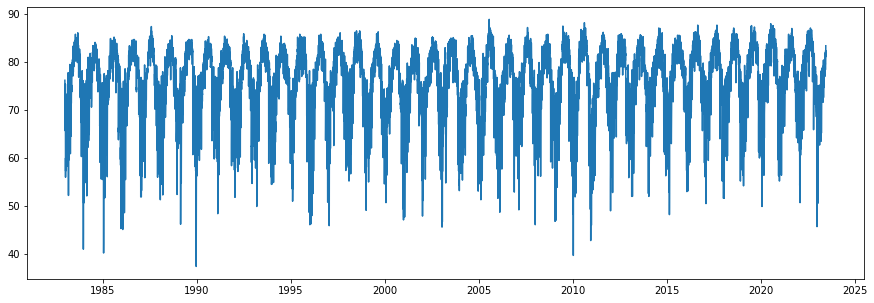

In [5]:
plt.figure(figsize = (15, 5))
plt.plot(dade_daily_avg["DATE"], dade_daily_avg["TMEAN"])
plt.show()

## Modeling

### Finalizing dataframe for modeling

In [6]:
### selects columns
cols = ["DATE", "TMEAN"]
df = dade_daily_avg[cols]

### converts date to datetime format
df["DATE"] = pd.to_datetime(df["DATE"])

### assigns column names
df.columns = ["ds", "y"] 

### displays data
df

/var/folders/8_/vf0g3np57bdb6_x59hshmtcr0000gn/T/ipykernel_23392/3762390483.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["DATE"] = pd.to_datetime(df["DATE"])


,ds,y
0,1983-01-01,76.2
1,1983-01-02,74.3
2,1983-01-03,74.5
3,1983-01-04,73.6
4,1983-01-05,71.2
...,...,...
14770,2023-06-10,80.8
14771,2023-06-11,82.4
14772,2023-06-12,81.4
14773,2023-06-13,81.1


### Imports module

In [7]:
### imports module
from neuralprophet import NeuralProphet

### Selecting testing and training data

In [8]:
### displays last row of 2019
df[df["ds"] == "2019-12-31"]

,ds,y
13513,2019-12-31,74.7


In [9]:
### assigns all data from 1983 to 2019 as training data
train_data = df[:13514]

train_data

,ds,y
0,1983-01-01,76.2
1,1983-01-02,74.3
2,1983-01-03,74.5
3,1983-01-04,73.6
4,1983-01-05,71.2
...,...,...
13509,2019-12-27,72.6
13510,2019-12-28,75.4
13511,2019-12-29,75.7
13512,2019-12-30,76.2


In [10]:
### assigns all data from 2021 to 2023 as testing data
test_data = df[13514:].reset_index(drop = True)

test_data

,ds,y
0,2020-01-01,69.2
1,2020-01-02,69.3
2,2020-01-03,71.8
3,2020-01-04,75.7
4,2020-01-05,71.3
...,...,...
1256,2023-06-10,80.8
1257,2023-06-11,82.4
1258,2023-06-12,81.4
1259,2023-06-13,81.1


### Setting batch size

The ideal number of batches for Neural Prophet's learning rate is 253.

In [11]:
### stores length of training dataframe
total_data_points = len(train_data)
### stores number of desired batches of data points to feed into the model
desired_batches = 253

### computes and stores the number of data points in each batch
batch_size = total_data_points // desired_batches
remaining_data_points = total_data_points % desired_batches
if remaining_data_points > 0:
    batch_size += 1

### Implementing model

#### Running model with 50 epochs

In [12]:
model = NeuralProphet(epochs = 50, daily_seasonality = True, batch_size = batch_size)
model.fit(train_data, freq = "D")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.993% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (251) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,49.812870,59.158627,0.460666,0.0,0
1,36.198242,44.293686,0.282367,0.0,1
2,21.179640,26.393427,0.113532,0.0,2
3,10.700244,13.247346,0.028537,0.0,3
4,6.060154,7.652658,0.008748,0.0,4
5,4.315943,5.612347,0.004930,0.0,5
6,3.641113,4.849691,0.003906,0.0,6
7,3.339525,4.554214,0.003507,0.0,7
8,3.197107,4.411901,0.003329,0.0,8
9,3.151304,4.369502,0.003269,0.0,9


In [13]:
### creates dataframe of predicted values for dates of testing data
future = model.make_future_dataframe(train_data, periods = len(test_data))
forecast = model.predict(future)
forecast = forecast.tail(len(test_data))  

### merges test data and forecasted data on date
forecast = pd.merge(test_data, forecast, on = "ds")

forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.993% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.921% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.921% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 251it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y_x,y_y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2020-01-01,69.2,None,69.289558,-15.301418,-8.312358,0.020340,92.883003
1,2020-01-02,69.3,None,69.073708,-15.300789,-8.442922,-0.065581,92.883003
2,2020-01-03,71.8,None,69.023590,-15.300156,-8.569429,0.010177,92.883003
3,2020-01-04,75.7,None,68.993111,-15.299526,-8.691361,0.101001,92.883003
4,2020-01-05,71.3,None,68.795326,-15.298897,-8.808212,0.019440,92.883003
...,...,...,...,...,...,...,...,...
1256,2023-06-10,80.8,None,83.825699,-14.510036,5.351736,0.101001,92.883003
1257,2023-06-11,82.4,None,83.847488,-14.509403,5.454454,0.019440,92.883003
1258,2023-06-12,81.4,None,83.907280,-14.508774,5.552528,-0.019476,92.883003
1259,2023-06-13,81.1,None,83.954834,-14.508144,5.645883,-0.065901,92.883003


##### Computing error-margins

In [14]:
### selects columns
forecast = forecast[["ds", "y_x", "yhat1"]]
### renames column
forecast = forecast.rename(columns = {"y_x": "y"})

### computes error-margins
rmse = np.sqrt(np.mean((forecast["y"] - forecast["yhat1"]) ** 2))
mae = np.mean(np.abs(forecast["y"] - forecast["yhat1"]))

### displays error margins
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)

### filters dataframe for May-Oct
forecast["ds"] = pd.to_datetime(forecast["ds"])
forecast_summer = forecast[(forecast["ds"].dt.month >= 5) & (forecast["ds"].dt.month <= 10)]
forecast.reset_index(drop = True, inplace = True)

### computes error-margins for summer months
rmse = np.sqrt(np.mean((forecast_summer["y"] - forecast_summer["yhat1"]) ** 2))
mae = np.mean(np.abs(forecast_summer["y"] - forecast_summer["yhat1"]))

### displays error margins
print("Mean absolute error (May-Oct):", mae)
print("Root mean squared error (May-Oct):", rmse)

Mean absolute error: 2.9850900370199245
Root mean squared error: 4.099350254192722
Mean absolute error (May-Oct): 2.033549054783194
Root mean squared error (May-Oct): 2.6819448459767274


##### Plotting results

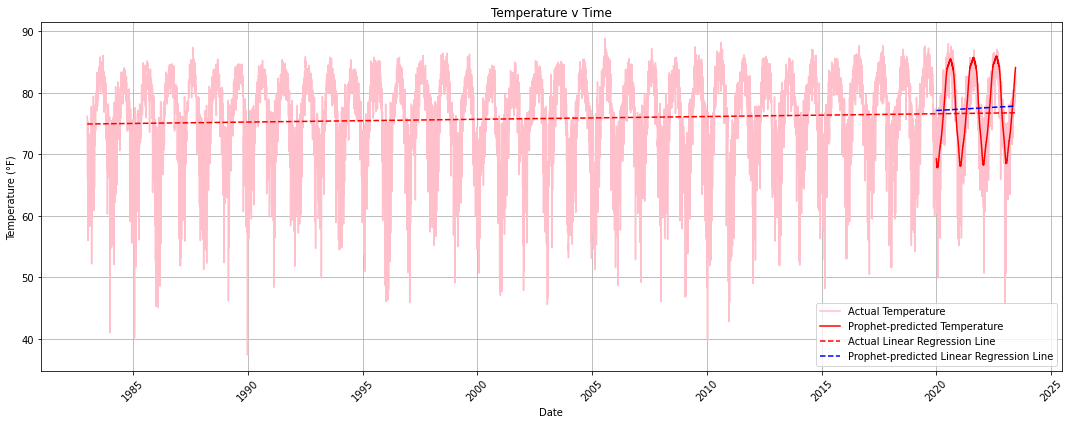

In [15]:
### reshapes index for linear regression
X_1 = df.index.values.reshape(-1, 1)
y_1 = df["y"]

### creates and implements model
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

### reshapes index for linear regression
X_2 = forecast.index.values.reshape(-1, 1)
y_2 = forecast["yhat1"]

### creates and implements model
model_2 = LinearRegression()
model_2.fit(X_2, y_2)

### creates plot
plt.figure(figsize = (15, 6))
plt.plot(df["ds"], df["y"], label = "Actual Temperature", color = "pink")
plt.plot(forecast["ds"], forecast["yhat1"], label = "Prophet-predicted Temperature", color = "red")
plt.plot(df["ds"], model_1.predict(X_1), linestyle = "dashed", color = "red", label = "Actual Linear Regression Line")
plt.plot(forecast["ds"], model_2.predict(X_2), linestyle = "dashed", color = "blue", label = "Prophet-predicted Linear Regression Line")

plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Temperature v Time")
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Running model with 250 epochs

In [16]:
model = NeuralProphet(epochs = 250, daily_seasonality = True, batch_size = batch_size)
model.fit(train_data, freq = "D")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.993% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (251) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,82.597748,94.921082,0.952438,0.0,0
1,69.685768,81.996613,0.759315,0.0,1
2,56.965233,68.629524,0.573287,0.0,2
3,44.903511,55.104103,0.403307,0.0,3
4,34.464622,42.661686,0.264524,0.0,4
...,...,...,...,...,...
245,3.070677,4.286012,0.003154,0.0,245
246,3.070902,4.282646,0.003155,0.0,246
247,3.069474,4.286509,0.003157,0.0,247
248,3.066058,4.284402,0.003148,0.0,248


In [17]:
### creates dataframe of predicted values for dates of testing data
future = model.make_future_dataframe(train_data, periods = len(test_data))
forecast = model.predict(future)
forecast = forecast.tail(len(test_data))  

### merges test data and forecasted data on date
forecast = pd.merge(test_data, forecast, on = "ds")

forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.993% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.921% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.921% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 251it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y_x,y_y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2020-01-01,69.2,None,69.227539,103.974625,-8.356639,0.029240,-26.419691
1,2020-01-02,69.3,None,69.005852,103.975243,-8.486091,-0.063615,-26.419691
2,2020-01-03,71.8,None,68.962143,103.975876,-8.611319,0.017280,-26.419691
3,2020-01-04,75.7,None,68.917374,103.976501,-8.731813,0.092374,-26.419691
4,2020-01-05,71.3,None,68.732422,103.977127,-8.847078,0.022067,-26.419691
...,...,...,...,...,...,...,...,...
1256,2023-06-10,80.8,None,83.804626,104.760658,5.371290,0.092374,-26.419691
1257,2023-06-11,82.4,None,83.837845,104.761284,5.474188,0.022067,-26.419691
1258,2023-06-12,81.4,None,83.884239,104.761909,5.572389,-0.030364,-26.419691
1259,2023-06-13,81.1,None,83.941681,104.762535,5.665823,-0.066982,-26.419691


##### Computing error margins

In [18]:
### selects columns
forecast = forecast[["ds", "y_x", "yhat1"]]
### renames column
forecast = forecast.rename(columns = {"y_x": "y"})

### computes error-margins
rmse = np.sqrt(np.mean((forecast["y"] - forecast["yhat1"]) ** 2))
mae = np.mean(np.abs(forecast["y"] - forecast["yhat1"]))

### displays error margins
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)

### filters dataframe for May-Oct
forecast["ds"] = pd.to_datetime(forecast["ds"])
forecast_summer = forecast[(forecast["ds"].dt.month >= 5) & (forecast["ds"].dt.month <= 10)]
forecast.reset_index(drop = True, inplace = True)

### computes error-margins for summer months
rmse = np.sqrt(np.mean((forecast_summer["y"] - forecast_summer["yhat1"]) ** 2))
mae = np.mean(np.abs(forecast_summer["y"] - forecast_summer["yhat1"]))

### displays error margins
print("Mean absolute error (May-Oct):", mae)
print("Root mean squared error (May-Oct):", rmse)

Mean absolute error: 2.9832544772989853
Root mean squared error: 4.095982567425134
Mean absolute error (May-Oct): 2.0237195601215716
Root mean squared error (May-Oct): 2.670573718371173


##### Plotting results

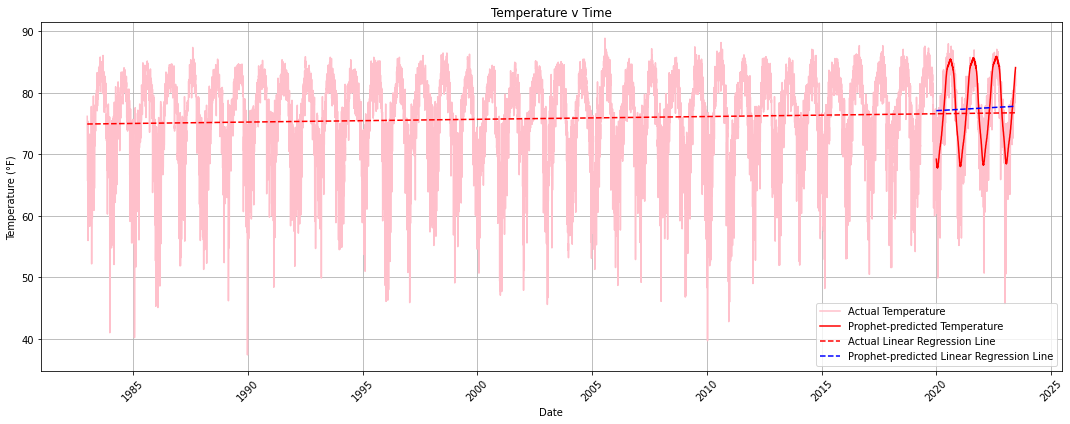

In [19]:
### reshapes index for linear regression
X_1 = df.index.values.reshape(-1, 1)
y_1 = df["y"]

### creates and implements model
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

### reshapes index for linear regression
X_2 = forecast.index.values.reshape(-1, 1)
y_2 = forecast["yhat1"]

### creates and implements model
model_2 = LinearRegression()
model_2.fit(X_2, y_2)

### creates plot
plt.figure(figsize = (15, 6))
plt.plot(df["ds"], df["y"], label = "Actual Temperature", color = "pink")
plt.plot(forecast["ds"], forecast["yhat1"], label = "Prophet-predicted Temperature", color = "red")
plt.plot(df["ds"], model_1.predict(X_1), linestyle = "dashed", color = "red", label = "Actual Linear Regression Line")
plt.plot(forecast["ds"], model_2.predict(X_2), linestyle = "dashed", color = "blue", label = "Prophet-predicted Linear Regression Line")

plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Temperature v Time")
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Running model with 5,000 epochs

In [20]:
model = NeuralProphet(epochs = 5000, daily_seasonality = True, batch_size = batch_size)
model.fit(train_data, freq = "D")

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.993% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (251) is too small than the required number for the learning rate finder (253). The results might not be optimal.


Finding best initial lr:   0%|          | 0/253 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,94.510391,103.900185,1.204717,0.0,0
1,78.922852,89.011047,0.962102,0.0,1
2,64.443611,74.793045,0.740640,0.0,2
3,51.325478,61.421070,0.544617,0.0,3
4,40.216011,49.392719,0.382436,0.0,4
...,...,...,...,...,...
4995,3.069477,4.291361,0.003154,0.0,4995
4996,3.069725,4.278296,0.003155,0.0,4996
4997,3.066314,4.283155,0.003150,0.0,4997
4998,3.065172,4.280151,0.003147,0.0,4998


In [21]:
### creates dataframe of predicted values for dates of testing data
future = model.make_future_dataframe(train_data, periods = len(test_data))
forecast = model.predict(future)
forecast = forecast.tail(len(test_data))  

### merges test data and forecasted data on date
forecast = pd.merge(test_data, forecast, on = "ds")

forecast

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.993% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.921% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.921% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


Predicting: 251it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y_x,y_y,yhat1,trend,season_yearly,season_weekly,season_daily
0,2020-01-01,69.2,None,69.226959,45.657764,-8.353148,0.027418,31.89493
1,2020-01-02,69.3,None,69.009781,45.658394,-8.482656,-0.060880,31.89493
2,2020-01-03,71.8,None,68.968307,45.659019,-8.607932,0.022294,31.89493
3,2020-01-04,75.7,None,68.915665,45.659645,-8.728462,0.089553,31.89493
4,2020-01-05,71.3,None,68.734726,45.660271,-8.843755,0.023279,31.89493
...,...,...,...,...,...,...,...,...
1256,2023-06-10,80.8,None,83.804504,46.445114,5.374912,0.089553,31.89493
1257,2023-06-11,82.4,None,83.841751,46.445740,5.477798,0.023279,31.89493
1258,2023-06-12,81.4,None,83.880722,46.446365,5.575946,-0.036523,31.89493
1259,2023-06-13,81.1,None,83.946060,46.446995,5.669284,-0.065141,31.89493


##### Computing error margins

In [22]:
### selects columns
forecast = forecast[["ds", "y_x", "yhat1"]]
### renames column
forecast = forecast.rename(columns = {"y_x": "y"})

### computes error-margins
rmse = np.sqrt(np.mean((forecast["y"] - forecast["yhat1"]) ** 2))
mae = np.mean(np.abs(forecast["y"] - forecast["yhat1"]))

### displays error margins
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)

### filters dataframe for May-Oct
forecast["ds"] = pd.to_datetime(forecast["ds"])
forecast_summer = forecast[(forecast["ds"].dt.month >= 5) & (forecast["ds"].dt.month <= 10)]
forecast.reset_index(drop = True, inplace = True)

### computes error-margins for summer months
rmse = np.sqrt(np.mean((forecast_summer["y"] - forecast_summer["yhat1"]) ** 2))
mae = np.mean(np.abs(forecast_summer["y"] - forecast_summer["yhat1"]))

### displays error margins
print("Mean absolute error (May-Oct):", mae)
print("Root mean squared error (May-Oct):", rmse)

Mean absolute error: 2.9838040659675302
Root mean squared error: 4.09614517006571
Mean absolute error (May-Oct): 2.0241112279332865
Root mean squared error (May-Oct): 2.6708803204471674


##### Plotting results

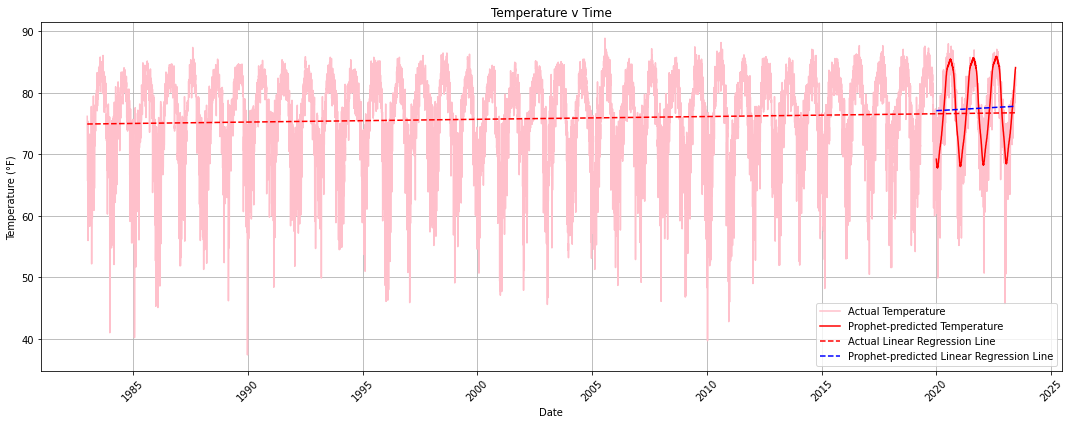

In [23]:
### reshapes index for linear regression
X_1 = df.index.values.reshape(-1, 1)
y_1 = df["y"]

### creates and implements model
model_1 = LinearRegression()
model_1.fit(X_1, y_1)

### reshapes index for linear regression
X_2 = forecast.index.values.reshape(-1, 1)
y_2 = forecast["yhat1"]

### creates and implements model
model_2 = LinearRegression()
model_2.fit(X_2, y_2)

### creates plot
plt.figure(figsize = (15, 6))
plt.plot(df["ds"], df["y"], label = "Actual Temperature", color = "pink")
plt.plot(forecast["ds"], forecast["yhat1"], label = "Prophet-predicted Temperature", color = "red")
plt.plot(df["ds"], model_1.predict(X_1), linestyle = "dashed", color = "red", label = "Actual Linear Regression Line")
plt.plot(forecast["ds"], model_2.predict(X_2), linestyle = "dashed", color = "blue", label = "Prophet-predicted Linear Regression Line")

plt.xlabel("Date")
plt.ylabel("Temperature (°F)")
plt.title("Temperature v Time")
plt.legend()
plt.xticks(rotation = 45)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Observations: 

There is not much difference in the MAE and RMSE values for 50, 250 and 5,000 epochs, suggesting that increasing the number will not affect the predictions significantly. However the 50-epoch model is very, very marginally more accurate.